In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df= pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
#creating a new column Family in the dataset by adding SibSp an Parch
df['Family'] = df['SibSp'] + df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [ ]:
#Ticket-->we can skip as it is just a random number

In [9]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [10]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [51]:
#Based on the categories, we will analyze which category people are more likely to survive
#Low,Mid,Mid-High,High
df['Fare_Category']=pd.cut(df.Fare,bins = [0, 7.9, 14.45, 31.00, 512],
                           labels = ['Low','Mid','Mid-High','High'])
df['Fare_Category'].head()

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_Category, dtype: category
Categories (4, object): [Low < Mid < Mid-High < High]

In [12]:
#Comparing Fare with Fare_Category
df[['Fare','Fare_Category']]

,Fare,Fare_Category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
5,8.4583,Mid
6,51.8625,High
7,21.0750,Mid-High
8,11.1333,Mid
9,30.0708,Mid-High


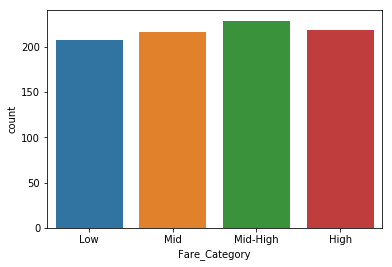

In [13]:
#Visualize the Fare_Category
## Countplot gives you entire count of a category --> categories of Survived and Deceased
sns.countplot(x ='Fare_Category' , data = df)

Text(0.5, 1.0, 'Survival based on Fare_Category')

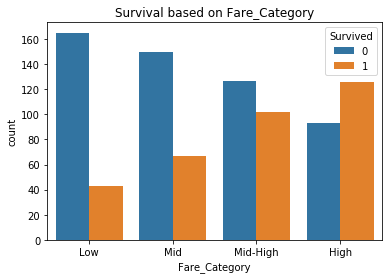

In [15]:
#Visualizing based on Survived
sns.countplot(x ='Fare_Category' ,hue= 'Survived' ,data = df).\
               set_title('Survival based on Fare_Category')

In [16]:
#Embarked : Port--> from where the passenger had boarded the ship
df.Embarked.value_counts(normalize = True) 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
#out of 100% passengers, which port has taken more %
df.Embarked.value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

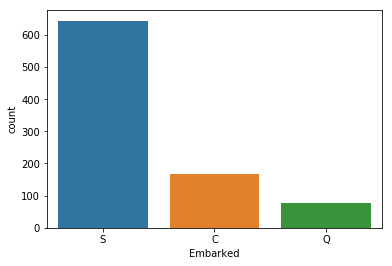

In [20]:
#Visualizing the port column
sns.countplot(x='Embarked',data = df)

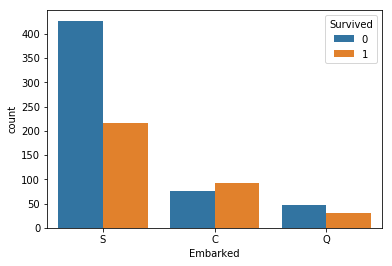

In [19]:
sns.countplot(x='Embarked',hue='Survived',data = df)

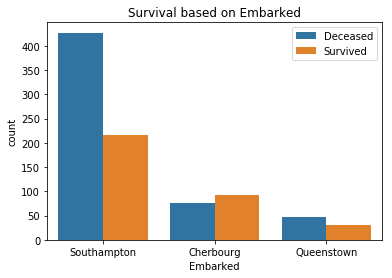

In [21]:
#giving names to ports, setting title,changing labels of 0 and 1
p=sns.countplot(x='Embarked',hue='Survived',data = df)
p.set_xticklabels(['Southampton','Cherbourg','Queenstown'])
p.set_title("Survival based on Embarked")
p.legend(labels= ["Deceased","Survived"])

In [55]:
## Imputing the missing values
df.isnull().mean().sort_values(ascending=False)

Age              0.198653
Fare_Category    0.020202
Embarked         0.002245
Family           0.000000
Cabin            0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [56]:
df.Cabin.head()

0      NA
1     C85
2      NA
3    C123
4      NA
Name: Cabin, dtype: object

In [57]:
## Cabin---> 77% missing values, we are going to create a new category as NA
df.Cabin.fillna('NA',inplace=True)

In [58]:
df.Cabin.isnull().sum()

0

In [59]:
## Age
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [60]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [61]:
# median-->sorting in the order(middle value) Nan in the age column should be substituted with median of age column
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

In [62]:
#imputing the Embarked column---> with mode i.e mode imputation
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid


In [64]:
df['Age-Range']= pd.cut(df.Age, [0, 10, 20, 30, 40, 60, 80])
df[['Age','Age-Range']].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]"


In [66]:
##ENCODING OF CATEGORICAL VARIABLES/COLUMNS:
dummy_set =pd.get_dummies(df.Fare_Category, drop_first = True ) # n columns, we need to include (n-1) dummy columns
dummy_set

,Mid,Mid-High,High
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,1,0,0
6,0,0,1
7,0,1,0
8,1,0,0
9,0,1,0


In [67]:
df = pd.concat([df, dummy_set], axis=1)

In [68]:
#encoding:
df = pd. concat([df, pd.get_dummies(df.Cabin,drop_first=True),
                pd.get_dummies(df.Embarked,prefix='Emb',drop_first=True),
                pd.get_dummies(df.Fare_Category,prefix='Fare',drop_first=True),
                pd.get_dummies(df['Age-Range'],drop_first=True)], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


labelencoder-->0,1,2,3,4...how many  categories are present in the columns,that many numbers we will get 
onehotencoder-->it will create dummy columns for each and every category

In [69]:
#Encoding the Sex column
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [70]:
df.drop(['PassengerId', 'Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Fare_Category','Cabin','Age-Range'],
       axis=1,inplace=True)
df.shape

(891, 164)

In [71]:
df.head()

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,A14,A16,A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [72]:
df.dtypes

Survived         int64
Pclass           int64
Sex              int32
Family           int64
Mid              uint8
Mid-High         uint8
High             uint8
A14              uint8
A16              uint8
A19              uint8
A20              uint8
A23              uint8
A24              uint8
A26              uint8
A31              uint8
A32              uint8
A34              uint8
A36              uint8
A5               uint8
A6               uint8
A7               uint8
B101             uint8
B102             uint8
B18              uint8
B19              uint8
B20              uint8
B22              uint8
B28              uint8
B3               uint8
B30              uint8
                 ...  
E44              uint8
E46              uint8
E49              uint8
E50              uint8
E58              uint8
E63              uint8
E67              uint8
E68              uint8
E77              uint8
E8               uint8
F E69            uint8
F G63            uint8
F G73      

In [ ]:
## StandardScalar -->not required for this(Distance Based alogorithm)

In [73]:
## SEPARATING THE INPUT AND OUTPUT DATA  ---> 'X' is input , 'y' is output
X = df.drop("Survived",axis=1)  # so that all other columns can become the input . X contains only input
X.shape

(891, 163)

In [76]:
y = df.iloc[:,0]
y.shape

(891,)

In [ ]:
## dividing input and output into training and testing data
#training--> we will be training the model on training data
#testing--> check the performance of the model
## out of 891 rows--> 75% we will be putting in training dataset and 25% in testing data

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=1) 
#random_state to select the constant rows

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 163)
(223, 163)
(668,)
(223,)
